# Functional API (instead of Sequential)
- extra flexibility

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv1D, AveragePooling1D, concatenate, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [3]:
df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/Datasets/diagnosis.csv')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:6], df.iloc[:,6:], test_size=0.33)

In [5]:
temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train.values)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test.values)

inflam_train, nephr_train = np.transpose(y_train.values)
inflam_test, nephr_test = np.transpose(y_test.values)

In [6]:
shape_inputs = (1,)
temperature = Input(shape=shape_inputs, name='temp')
nausea_occurence = Input(shape=shape_inputs, name='nocc')
lumbar_pain = Input(shape=shape_inputs, name='lumbp')
urine_pushing = Input(shape=shape_inputs, name='up')
micturition_pains = Input(shape=shape_inputs, name='mict')
bis = Input(shape=shape_inputs, name='bis')

list_inputs = [temperature, nausea_occurence, lumbar_pain, urine_pushing, micturition_pains, bis]


In [7]:
x = concatenate(list_inputs)

In [8]:
inflammation_pred = Dense(1, activation='sigmoid', name='inflam')(x)
nephritis_pred = Dense(1, activation='sigmoid', name='nephr')(x)
list_outputs = [inflammation_pred, nephritis_pred]

In [9]:
model = Model(inputs=list_inputs, outputs = list_outputs)

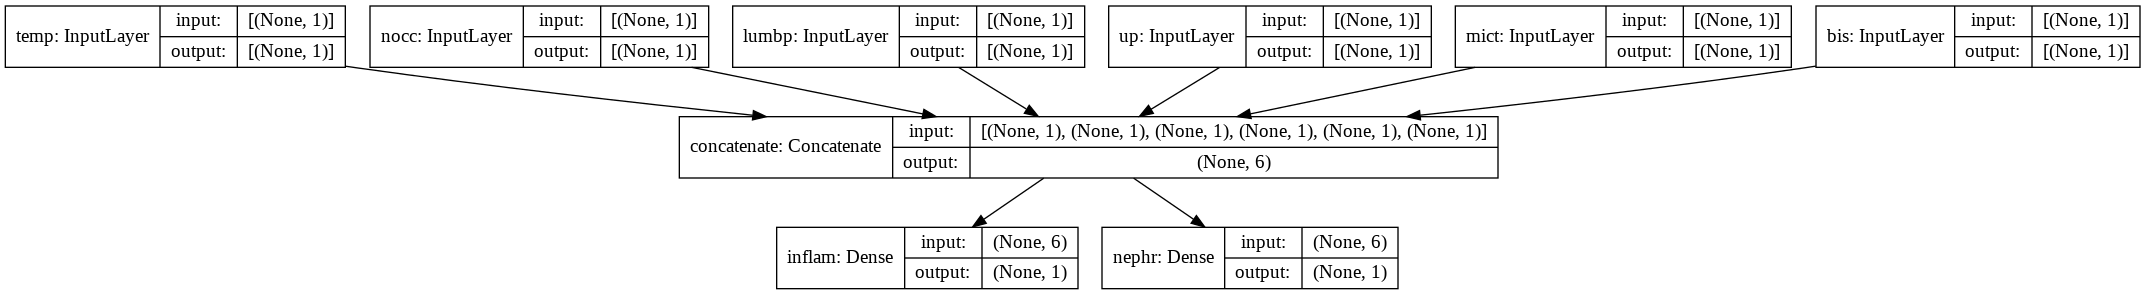

In [10]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [11]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3), loss={'inflam':'binary_crossentropy', 'nephr':'binary_crossentropy'},
              metrics=[['acc'], ['acc']], loss_weights=[1,0.2])

In [12]:
inputs_train = {'temp':temp_train, 'nocc':nocc_train, 'lumbp':lumbp_train,
                'up':up_train, 'mict':mict_train, 'bis':bis_train} # can also just use vector form as long as you get order right
outputs_train = {'inflam':inflam_train, 'nephr':nephr_train}

history = model.fit(inputs_train, outputs_train, epochs=1000, batch_size=128, verbose=False)

In [13]:
model.evaluate([temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test], [inflam_test, nephr_test])

2/2 [==============================] - 0s 13ms/step - loss: 0.4691 - inflam_loss: 0.2987 - nephr_loss: 0.8518 - inflam_acc: 1.0000 - nephr_acc: 0.2250


[0.4691128730773926,
 0.2987469732761383,
 0.8518294095993042,
 1.0,
 0.22499999403953552]

# Variables

In [14]:
my_var = tf.Variable([-1,2], dtype=tf.float32, name='my_var')
my_var.assign([3.5, -1]) # change variable using this function (must be same shape)
my_var

<tf.Variable 'my_var:0' shape=(2,) dtype=float32, numpy=array([ 3.5, -1. ], dtype=float32)>

In [15]:
my_var.numpy() # convert into numpy array

array([ 3.5, -1. ], dtype=float32)

# Tensors

In [16]:
my_var = tf.Variable([-1, 2], dtype=tf.float32, name='my_var')
h = my_var + [5, 4]
h

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([4., 6.], dtype=float32)>

In [17]:
inputs = Input(shape=(5,))
h = Dense(16, activation='sigmoid',)(inputs)
outputs = Dense(10, activation='softmax')(h)
print(h)
print(outputs)

KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='dense/Sigmoid:0', description="created by layer 'dense'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_1/Softmax:0', description="created by layer 'dense_1'")


In [18]:
tf.constant([21, 7])

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([21,  7], dtype=int32)>

In [19]:
tf.constant([21, 7]).numpy()

array([21,  7], dtype=int32)

In [20]:
tf.ones(shape=(2,1)) # another way to make a tf.constant

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [21]:
tf.zeros(shape=(2,1)) # another way to make a tf.constant

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

In [22]:
strings = tf.Variable(['Hello World!'], tf.string)
complexs = tf.Variable([2+3j, 5+4j], tf.complex128)

In [23]:
tf.Variable(tf.constant(4.2, shape=(3,3)))

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[4.2, 4.2, 4.2],
       [4.2, 4.2, 4.2],
       [4.2, 4.2, 4.2]], dtype=float32)>

In [24]:
v = tf.Variable(0.0)
w = v+1 # w is a tensor
print(type(w))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [25]:
v.assign_add(1) # add 1 to a variable
v

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>

In [26]:
v.assign_sub(2) # subtract 2 from a variable
v

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-1.0>

In [27]:
t = tf.constant(np.arange(80), shape=[5,2,8])

In [28]:
tf.rank(t) # rank of t

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [29]:
t2 = tf.reshape(t, [8,10])
t2.shape

TensorShape([8, 10])

In [30]:
ones = tf.ones(shape=(2,2))
zeros = tf.zeros(shape=(2,2))
eye=tf.eye(3)
tensor7 = tf.constant(7.0, shape=(2,2))

In [31]:
eye

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>

In [32]:
tf.concat([ones, zeros], axis=0)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

In [33]:
tf.concat([ones, zeros], axis=1)

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[1., 1., 0., 0.],
       [1., 1., 0., 0.]], dtype=float32)>

In [34]:
t = tf.constant(np.arange(24), shape=(3,2,4))

t1 = tf.expand_dims(t, 0)
t2 = tf.expand_dims(t, 1)
t3 = tf.expand_dims(t, 2)
t4 = tf.expand_dims(t, 3)

print(t1.shape, t2.shape, t3.shape, t4.shape)

(1, 3, 2, 4) (3, 1, 2, 4) (3, 2, 1, 4) (3, 2, 4, 1)


In [35]:
tf.squeeze(t3,2).shape # squeeze is opposite of expand_dim

TensorShape([3, 2, 4])

In [36]:
x = tf.constant([1,2,3,4,5,6,7])
x[1:4]

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 3, 4], dtype=int32)>

In [37]:
c = tf.constant([[1,2],[3,4]])
d = tf.constant([[1,1],[0,1]])
tf.matmul(c,d)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 3],
       [3, 7]], dtype=int32)>

In [38]:
print(c*d, c+d, c-d, c/d)

tf.Tensor(
[[1 2]
 [0 4]], shape=(2, 2), dtype=int32) tf.Tensor(
[[2 3]
 [3 5]], shape=(2, 2), dtype=int32) tf.Tensor(
[[0 1]
 [3 3]], shape=(2, 2), dtype=int32) tf.Tensor(
[[ 1.  2.]
 [inf  4.]], shape=(2, 2), dtype=float64)


In [39]:
print(c*-1, tf.abs(c*-1))

tf.Tensor(
[[-1 -2]
 [-3 -4]], shape=(2, 2), dtype=int32) tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [40]:
tf.pow(c,c)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[  1,   4],
       [ 27, 256]], dtype=int32)>

In [41]:
tf.random.normal(shape=(2,2), mean=0, stddev=1)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.26689172,  1.1653943 ],
       [ 0.6983337 ,  0.6316315 ]], dtype=float32)>

In [42]:
tf.random.uniform(shape=(2,1), minval=0, maxval=10, dtype='int32')

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[6],
       [2]], dtype=int32)>

# Accessing layer variables

In [43]:
inputs = Input(shape=(32,1))
h = Conv1D(3, 5, activation='relu', name='CONV_1')(inputs)
h = AveragePooling1D(3)(h)
h = Flatten()(h)
outputs = Dense(1, activation='sigmoid')(h)

model = Model(inputs=inputs, outputs=outputs)

In [44]:
for layer in model.layers:
  print(layer)

In [45]:
model.layers[1].weights

[<tf.Variable 'CONV_1/kernel:0' shape=(5, 1, 3) dtype=float32, numpy=
 array([[[ 0.08008617,  0.11770195, -0.16837761]],
 
        [[ 0.19832164,  0.28199154,  0.44070292]],
 
        [[ 0.00470638,  0.2978729 ,  0.30566907]],
 
        [[-0.48852345,  0.3992868 , -0.01488447]],
 
        [[ 0.00076222, -0.06544954,  0.06188256]]], dtype=float32)>,
 <tf.Variable 'CONV_1/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [46]:
model.layers[1].kernel

<tf.Variable 'CONV_1/kernel:0' shape=(5, 1, 3) dtype=float32, numpy=
array([[[ 0.08008617,  0.11770195, -0.16837761]],

       [[ 0.19832164,  0.28199154,  0.44070292]],

       [[ 0.00470638,  0.2978729 ,  0.30566907]],

       [[-0.48852345,  0.3992868 , -0.01488447]],

       [[ 0.00076222, -0.06544954,  0.06188256]]], dtype=float32)>

In [47]:
model.get_layer('CONV_1').get_weights() # get_weights gets the numpy arrays (whereas weights gets the tensor variables)

[array([[[ 0.08008617,  0.11770195, -0.16837761]],
 
        [[ 0.19832164,  0.28199154,  0.44070292]],
 
        [[ 0.00470638,  0.2978729 ,  0.30566907]],
 
        [[-0.48852345,  0.3992868 , -0.01488447]],
 
        [[ 0.00076222, -0.06544954,  0.06188256]]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

In [48]:
inputs = Input(shape=(32,1), name='MY_INPUT')
h = Conv1D(3, 5, activation='relu', name='CONV_1')(inputs)
h = AveragePooling1D(3, name='AVG_POOL')(h)
h = Flatten(name='FLAT')(h)
outputs = Dense(1, activation='sigmoid', name='MY_OUTPUT')(h)

model = Model(inputs=inputs, outputs=outputs)

print(model.get_layer('CONV_1').input)
print(model.get_layer('CONV_1').output)

KerasTensor(type_spec=TensorSpec(shape=(None, 32, 1), dtype=tf.float32, name='MY_INPUT'), name='MY_INPUT', description="created by layer 'MY_INPUT'")
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 3), dtype=tf.float32, name=None), name='CONV_1/Relu:0', description="created by layer 'CONV_1'")


In [49]:
# can build new models by accessing layers of original model
flatten_output = model.get_layer('FLAT').output
model2 = Model(inputs=model.input, outputs=flatten_output)

# can pass in old model into Sequential API (common in transfer learning using an existing model such as resnet50)
model3 = Sequential([
                     model2,
                     Dense(10, activation='softmax', name='NEW_DENSE')
])

# can also do it using Functional API
new_outputs = Dense(10, activation='softmax')(model2.output)
model4 = Model(inputs=model2.input, outputs=new_outputs)

In [50]:
from tensorflow.keras.applications import VGG19
vgg_model = VGG19()

574717952/574710816 [==============================] - 4s 0us/step


In [51]:
vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [52]:
layer_outputs = [layer.output for layer in vgg_layers]
features = Model(inputs=vgg_input, outputs=layer_outputs) #this model returns outputs of every layer of VGG19 model

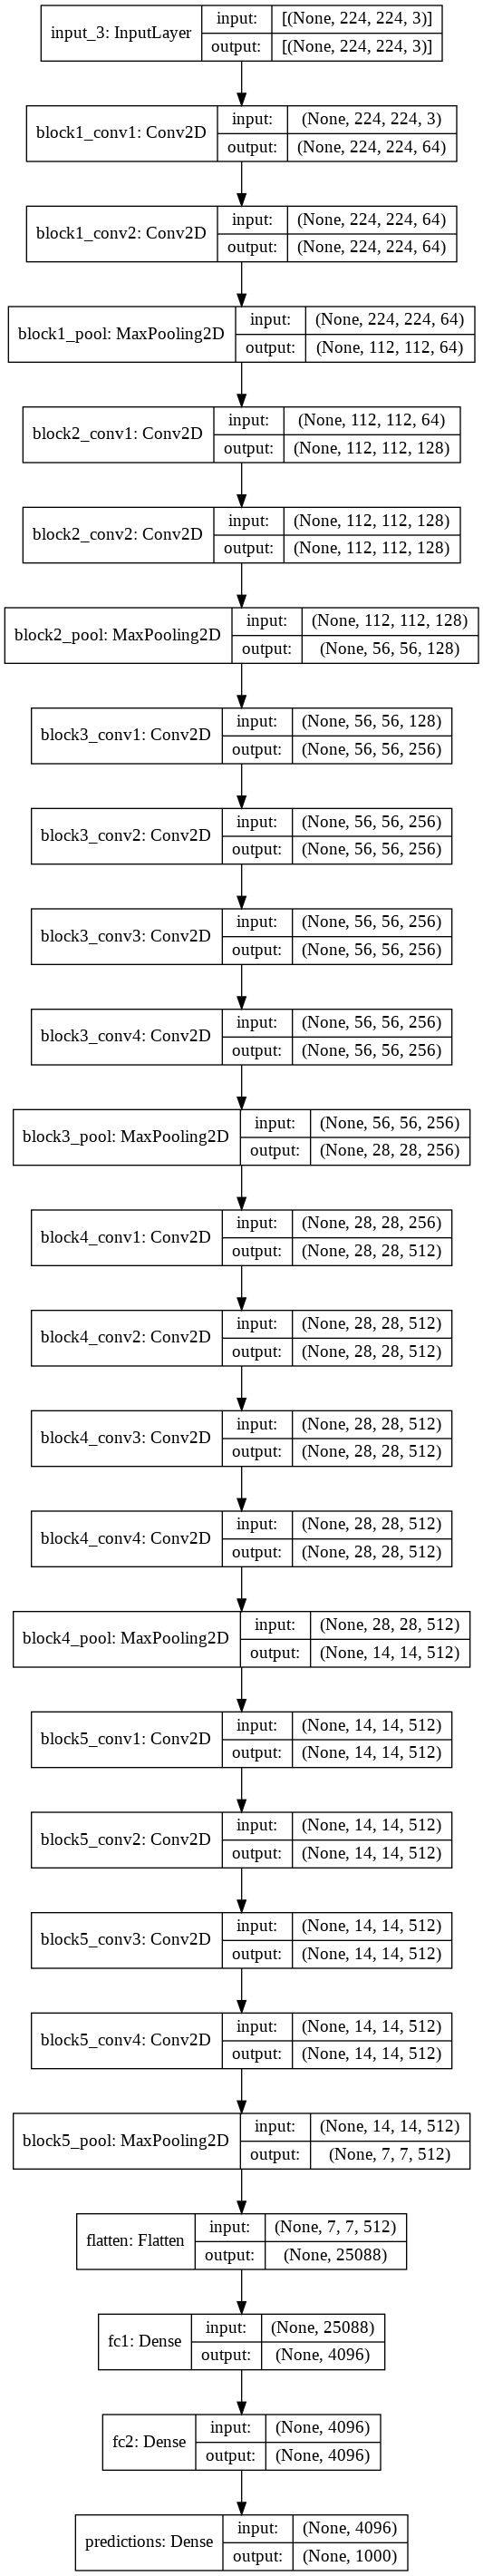

In [53]:
tf.keras.utils.plot_model(features, show_shapes=True)

In [54]:
img = np.random.random((1,224,224,3)).astype('float32')
extracted_features = features(img)

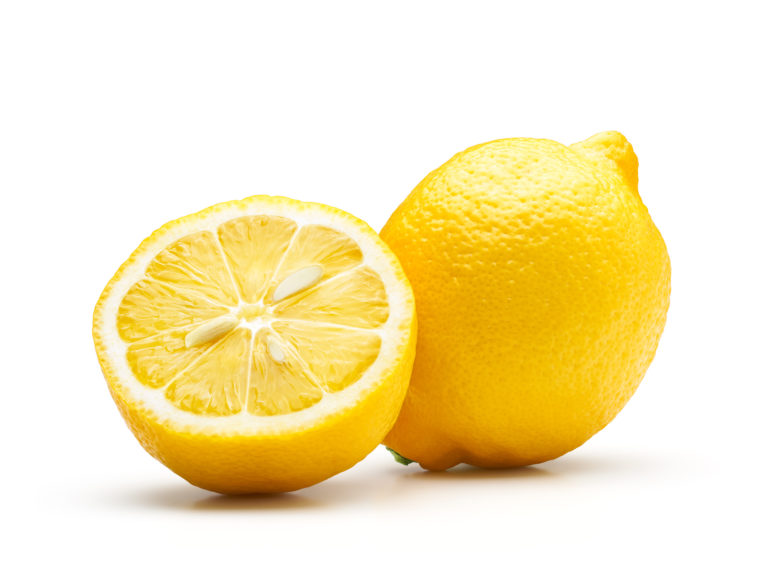

In [55]:
import IPython.display as display
from PIL import Image

display.display(Image.open('gdrive/MyDrive/Colab Notebooks/Images/lemon.jpg'))

In [56]:
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
img_path = 'gdrive/MyDrive/Colab Notebooks/Images/lemon.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [57]:
extracted_features = features(x)

f1.shape: (1, 224, 224, 3)


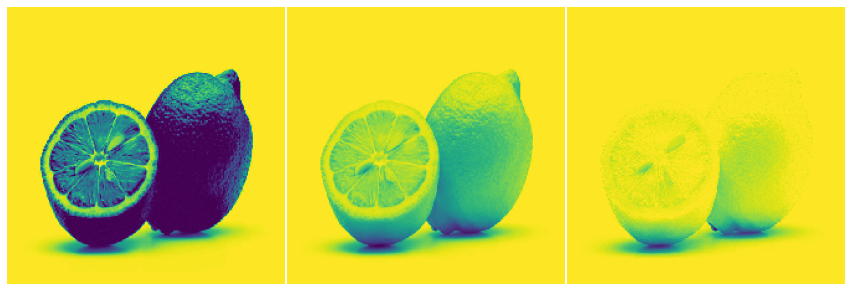

In [58]:
f1 = extracted_features[0]
print('f1.shape: {}'.format(f1.shape))

imgs = f1[0,:,:]
plt.figure(figsize=(15,15))
for n in range(3):
  ax = plt.subplot(1,3,n+1)
  plt.imshow(imgs[:,:,n])
  plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

f2.shape: (1, 224, 224, 64)


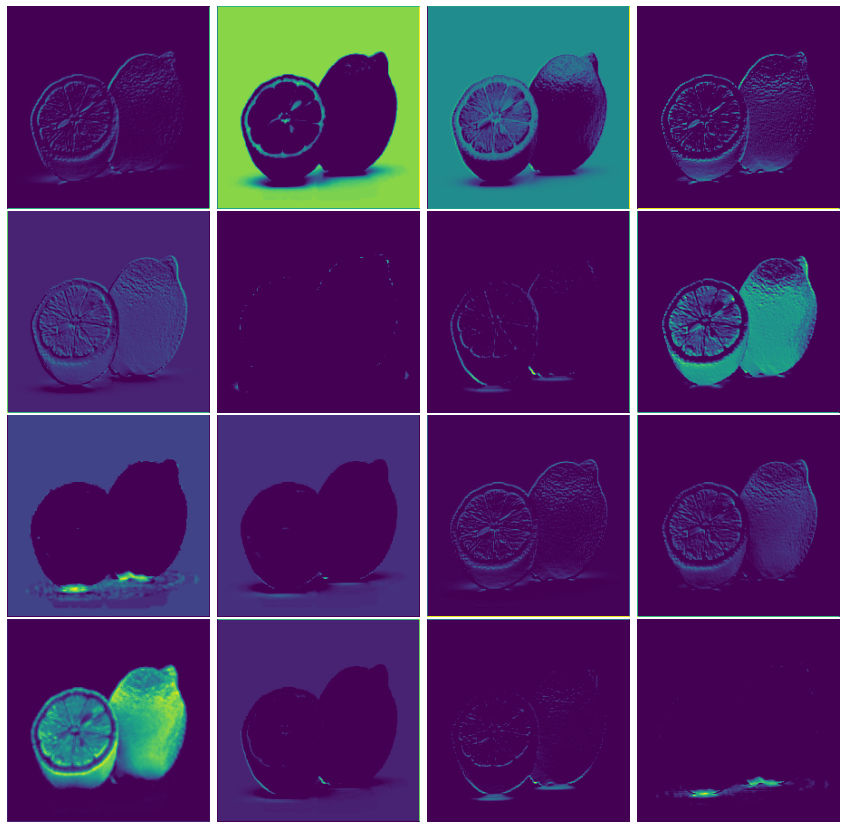

In [59]:
f2 = extracted_features[1]
print('f2.shape: {}'.format(f2.shape))

imgs = f2[0,:,:]
plt.figure(figsize=(15,15))
for n in range(16):
  ax = plt.subplot(4,4,n+1)
  plt.imshow(imgs[:,:,n])
  plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

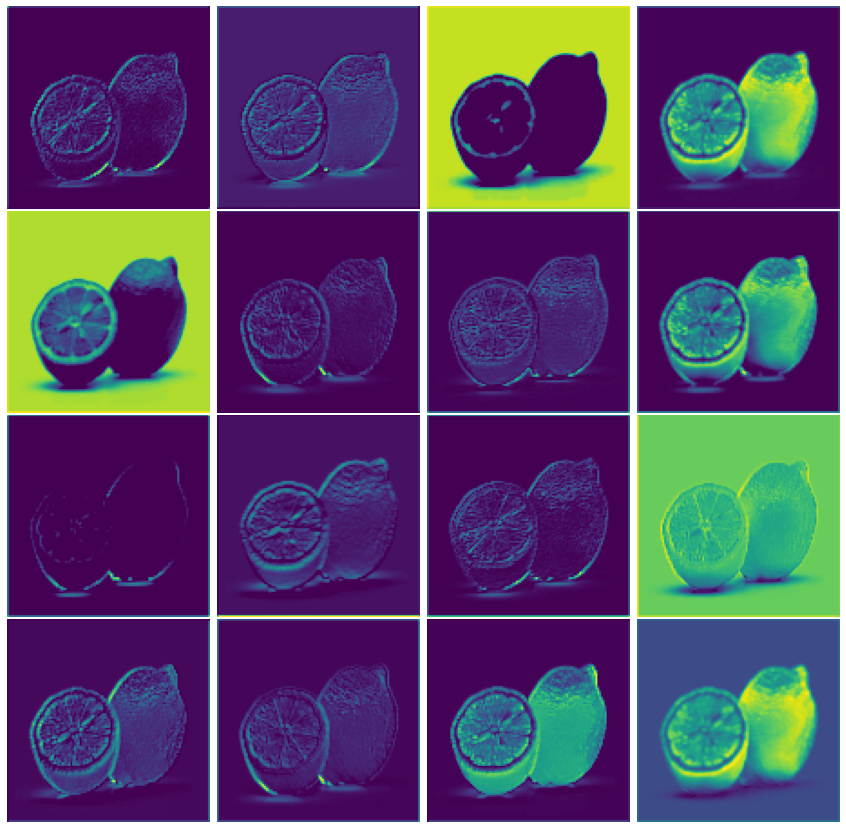

In [60]:
extracted_features_block1_pool = Model(inputs=features.input, outputs=features.get_layer('block1_pool').output)
block1_pool_features = extracted_features_block1_pool.predict(x)

imgs = block1_pool_features[0,:,:]
plt.figure(figsize=(15,15))
for n in range(16):
  ax = plt.subplot(4,4,n+1)
  plt.imshow(imgs[:,:,n])
  plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

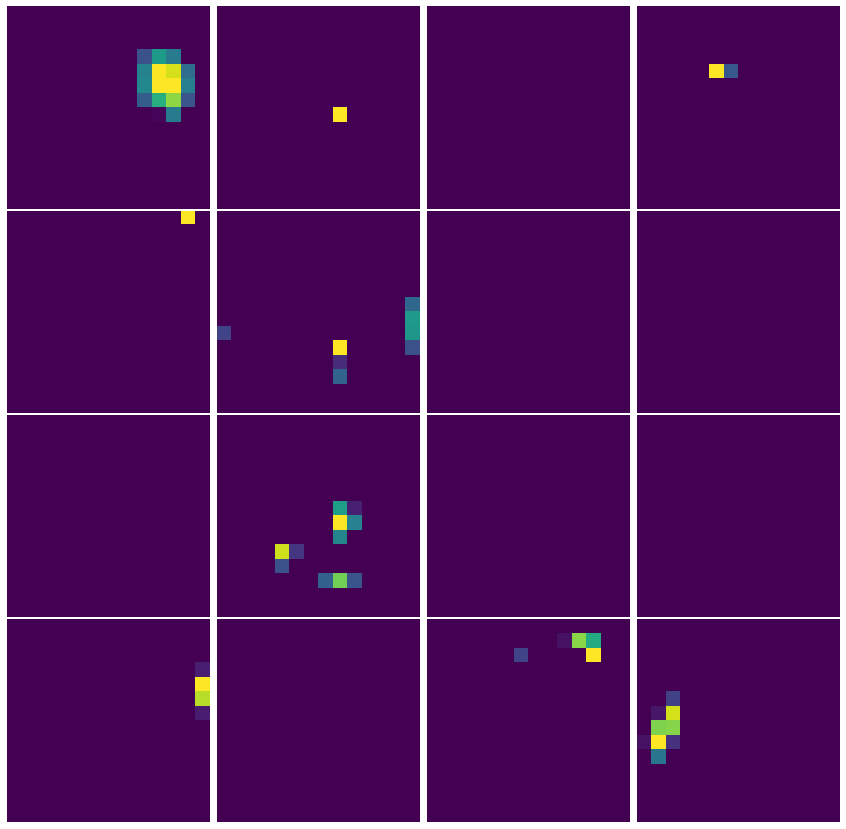

In [61]:
extracted_features_block5_conv4 = Model(inputs=features.input, outputs=features.get_layer('block5_conv4').output)
block5_conv4_features = extracted_features_block5_conv4.predict(x)

imgs = block5_conv4_features[0,:,:]
plt.figure(figsize=(15,15))
for n in range(16):
  ax = plt.subplot(4,4,n+1)
  plt.imshow(imgs[:,:,n])
  plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

# Freezing Layers

In [62]:
inputs = Input(shape=(8,8,1), name='input_layer')
h = Conv2D(16, 3, activation='relu', name='conv2d_layer', trainable=False)(inputs) # prevent weights from changing during training with trainable=False
h = MaxPooling2D(3, name='max_pool2d_layer')(h)
h = Flatten(name='flatten_layer')(h)
outputs = Dense(10, activation='softmax', name='softmax_layer')(h)

model = Model(inputs=inputs, outputs=outputs)

model.get_layer('conv2d_layer').trainable = False # can also do it this way (must be done before compiling!)

model.trainable = False # freeze all weights of entire model

In [63]:
model = Sequential([
                    Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform', bias_initializer='ones'),
                    Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
                    Dense(4, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 12        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [64]:
def get_weights(model):
  return [e.kernel.numpy() for e in model.layers]

def plot_weight_differences(model, w0_layers, w1_layers):
  plt.figure(figsize=(8,8))
  for n in range(3):
    delta_1 = w1_layers[n] - w0_layers[n]
    ax = plt.subplot(1,3,n+1)
    plt.imshow(delta_1)
  plt.colorbar()

In [65]:
w0_layers = get_weights(model)
b0_layers = [e.bias.numpy() for e in model.layers]

In [66]:
X_train = np.random.random((100,4))
X_test = np.random.random((20,4))
y_train = X_train
y_test = X_test

In [67]:
model.compile(optimizer='adam', loss='mse', metrics=['acc'])
model.fit(X_train, y_train, epochs=50, verbose=False)

In [68]:
w1_layers = get_weights(model)
b1_layers = [e.bias.numpy() for e in model.layers]

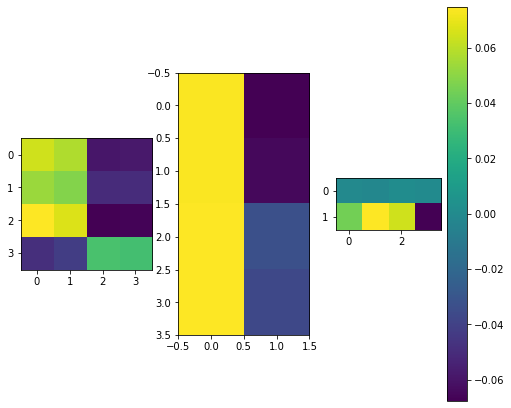

In [69]:
plot_weight_differences(model, w0_layers, w1_layers)

In [70]:
n_trainable = len(model.trainable_variables)
n_nontrainable = len(model.non_trainable_variables)
print('trainable: ', n_trainable)
print('non-trainable: ', n_nontrainable)

trainable:  6
non-trainable:  0


In [71]:
model = Sequential([
                    Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform', bias_initializer='ones', trainable=False),
                    Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
                    Dense(4, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 12        
Total params: 42
Trainable params: 22
Non-trainable params: 20
_________________________________________________________________


In [72]:
n_trainable = len(model.trainable_variables)
n_nontrainable = len(model.non_trainable_variables)
print('trainable: ', n_trainable)
print('non-trainable: ', n_nontrainable)

trainable:  4
non-trainable:  2


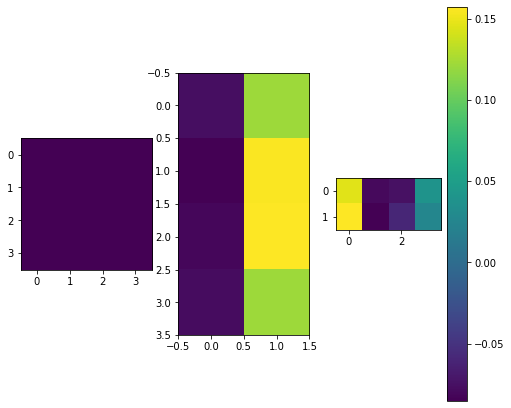

In [73]:
w0_layers = get_weights(model)
b0_layers = [e.bias.numpy() for e in model.layers]

model.compile(optimizer='adam', loss='mse', metrics=['acc'])
model.fit(X_train, y_train, epochs=50, verbose=False)

w1_layers = get_weights(model)
b1_layers = [e.bias.numpy() for e in model.layers]

plot_weight_differences(model, w0_layers, w1_layers)

# Device Placement
- how to access device associated to a give tensor, and compare the use of GPUs and CPUs
- TensorFlow automatically allocates tensor operations to specific devices

In [74]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [75]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [76]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [77]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [78]:
x = tf.random.uniform([3,3])
x.device # get the tensor device

'/job:localhost/replica:0/task:0/device:GPU:0'

In [79]:
import time

def time_matadd(x):
  start = time.time()
  for loop in range(10):
    tf.add(x,x)
  result = time.time()-start
  print('Matrix addition (10 loops): {:0.2f} ms'.format(1000*result))

def time_matmul(x):
  start = time.time()
  for loop in range(10):
    tf.matmul(x,x)
  result = time.time()-start
  print('Matrix multiplication (10 loops): {:0.2f} ms'.format(1000*result))

In [81]:
# test time for operations using CPU
with tf.device('CPU:0'): # force operation on CPU
  x = tf.random.uniform([1000,1000])
  assert x.device.endswith('CPU:0') # confirm that the operation is done using the CPU
  time_matadd(x)
  time_matmul(x)

Matrix addition (10 loops): 8.60 ms
Matrix multiplication (10 loops): 383.48 ms


In [82]:
# test time for operations using GPU
with tf.device('GPU:0'): # force operation on GPU
  x = tf.random.uniform([1000,1000])
  assert x.device.endswith('GPU:0') # confirm that the operation is done using the GPU
  time_matadd(x)
  time_matmul(x)

Matrix addition (10 loops): 0.55 ms
Matrix multiplication (10 loops): 1.73 ms


In [83]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255, X_test / 255

11493376/11490434 [==============================] - 0s 0us/step


In [84]:
X_train, y_train = X_train[:1000], y_train[:1000] # reduce size to speed up training

In [85]:
def get_model():
  model = Sequential([
                      Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                      MaxPooling2D(2),
                      Conv2D(64, 3, activation='relu', padding='same'),
                      MaxPooling2D(2),
                      Conv2D(128, 3, activation='relu', padding='same'),
                      MaxPooling2D(2),
                      Flatten(),
                      Dense(64, activation='relu'),
                      Dense(10, activation='softmax')
  ])
  return model

In [87]:
with tf.device('CPU:0'):
  model = get_model()
  model.compile(optimizer=keras.optimizers.RMSprop(1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  start = time.time()
  model.fit(X_train[..., np.newaxis], y_train, epochs=5, verbose=0)
  result = time.time() - start
print('CPU training time: {:0.2f} ms'.format(1000*result))

CPU training time: 6507.00 ms


In [89]:
with tf.device('GPU:0'):
  model = get_model()
  model.compile(optimizer=keras.optimizers.RMSprop(1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  start = time.time()
  model.fit(X_train[..., np.newaxis], y_train, epochs=5, verbose=0)
  result = time.time() - start
print('CPU training time: {:0.2f} ms'.format(1000*result))

CPU training time: 1059.47 ms
